### Data Exploration and other examples

In [1]:
import os
os.chdir('..')

In [2]:
# Import all the packages we need to generate recommendations
import numpy as np
import pandas as pd
import src.utils as utils
import src.recommenders as recommenders
import src.similarity as similarity

# Enable logging on Jupyter notebook
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
# imports necesary for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
# loads the dataset (assumes the data is downloaded)
dataset_folder = os.getcwd()+'/data/'
imdb_ratings = dataset_folder +'/ratings.csv'
links_file = dataset_folder + '/ml-latest-small/links.csv'
ratings_file = dataset_folder + '/ratings-imdb.csv'

# adds personal ratings to original dataset ratings file.
dataset_folder_ready = utils.load_dataset(dataset_folder)
utils.import_imdb_ratings(imdb_ratings, links_file, ratings_file)
[ratings, my_customer_number] = utils.merge_datasets(dataset_folder_ready, ratings_file)

INFO:root:dataset was already downloaded
INFO:root:dataset stored in: /Users/hcorona/github/recsys-101-workshop/data/ml-latest-small
INFO:root:wrote IMDB ratings into the dataset format to /Users/hcorona/github/recsys-101-workshop/data//ratings-imdb.csv
INFO:root:loaded 44 personal ratings
INFO:root:loaded 9125 movies
INFO:root:loaded 100048 ratings in total


In [5]:
# the data is stored in a long pandas dataframe
# we need to pivot the data to create a [user x movie] matrix
ratings_matrix = ratings.pivot_table(index='customer', columns='movie', values='rating', fill_value=0)
ratings_matrix = ratings_matrix.transpose()

#### Basic data exploration 

In [6]:
# number of users, items and ratings
n_users= len(ratings['customer'].unique())
n_items= len(ratings['movie'].unique())
n_ratings = ratings.shape[0]

print('number of users',n_users)
print('number of items', n_items)
print('number of ratings', n_ratings)

number of users 672
number of items 9064
number of ratings 100048


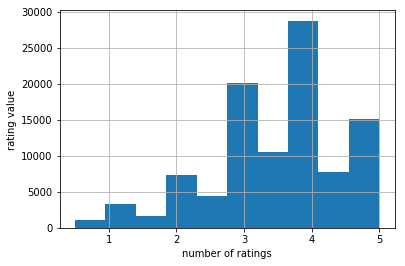

In [7]:
# Plot distribution of ratings using the pandas plot functionality
histogram = ratings['rating'].hist()
histogram.set_xlabel('number of ratings')
histogram.set_ylabel('rating value')

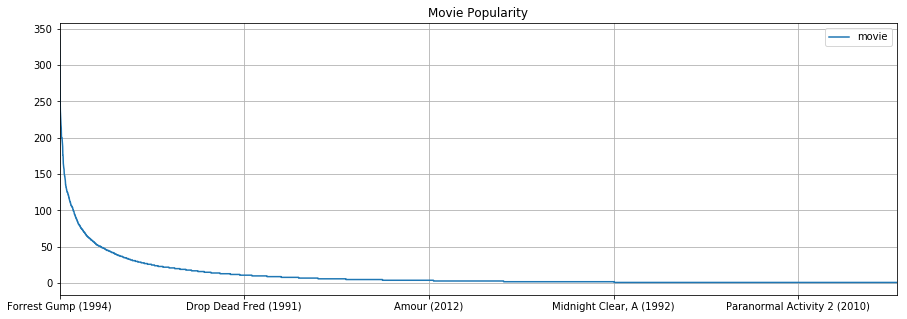

In [8]:
# movie popularity distribution
popularity = pd.DataFrame(ratings['movie'].value_counts())
popularity.sort_values(by='movie', ascending=False)
popularity.plot(figsize=(15, 5), title="Movie Popularity").grid(True)

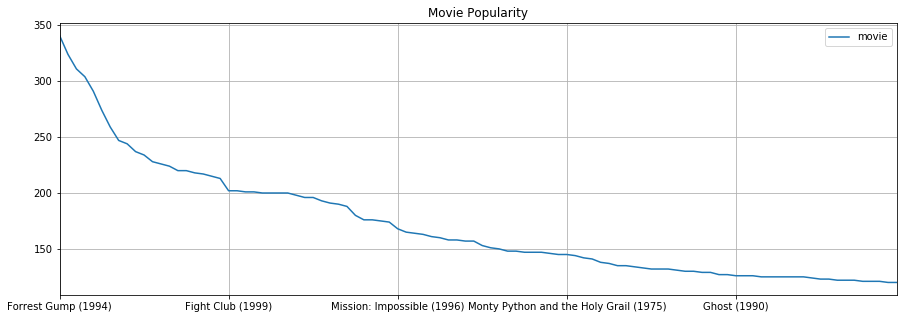

In [9]:
# movie popularity distribution: zoom into the top-100 movies
popularity[0:100].plot(figsize=(15, 5), title="Movie Popularity").grid(True)